In [2]:
import Pkg
Pkg.activate(".")




  Activating project at `c:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1`


In [3]:
Pkg.status()

Status `C:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Project.toml`
  [6d3278bc] ARCHModels v2.6.1
  [336ed68f] CSV v0.10.15
  [a93c6f00] DataFrames v1.8.1
  [31c24e10] Distributions v0.25.122
  [634d3b9d] DrWatson v2.19.1
  [f6369f11] ForwardDiff v1.2.2
  [7073ff75] IJulia v1.31.1
  [945b72a4] MarketData v0.15.0
  [429524aa] Optim v1.13.2
  [91a5bcdd] Plots v1.41.1
  [b0e4dd01] RollingFunctions v0.8.1
  [10745b16] Statistics v1.11.1
  [2913bbd2] StatsBase v0.34.7
⌅ [9e3dc215] TimeSeries v0.24.2
  [e4b3b0a2] YFinance v0.1.10
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [4]:
# Pkg.add("DrWatson")
using DrWatson
@quickactivate "Assignment1"
# initialize_project("Assignment1"; authors = "Jáchym Janů")
# Pkg.add(["Distributions", "Plots", "ForwardDiff" , "Optim" , "MarketData" , "YFinance" , "ARCHModels", "CSV", "DataFrames", "RollingFunctions", "StatsBase", "Statistics", "IJulia"])
# Pkg.add(["TimeSeries"])

In [ ]:
using IJulia
# IJulia.installkernel("Julia")
using Distributions
using Plots; gr()
using ForwardDiff
using Optim
using MarketData
using YFinance
using ARCHModels
using CSV
using DataFrames
using Plots.PlotMeasures
using RollingFunctions
using StatsBase
using Statistics
using TimeSeries


[ Info: Installing 'Julia 1.11.7' kernelspec in C:\Users\jachy\AppData\Roaming\jupyter\kernels\julia-1.11


In [6]:
# Load the VTYX data
file_path = "VTYX.txt"
column_names = [
    :Date, 
    :Time, 
    :Open, 
    :High, 
    :Low, 
    :Close, 
    :Volume
]

VTYX_data = CSV.read(
    file_path, 
    DataFrame, 
    delim=',',            
    ignorerepeated=true,
    header=column_names 
)


println(first(VTYX_data, 5))
println(last(VTYX_data, 5))

5×7 DataFrame
 Row │ Date        Time      Open     High     Low      Close    Volume 
     │ String15    Time      Float64  Float64  Float64  Float64  Int64  
─────┼──────────────────────────────────────────────────────────────────
   1 │ 10/21/2021  11:30:00  18.65      19.44    18.65    19.44  335243
   2 │ 10/21/2021  11:35:00  19.78      19.78    18.53    19.01  118936
   3 │ 10/21/2021  11:40:00  19.03      19.37    19.0     19.25   30569
   4 │ 10/21/2021  11:45:00  19.2995    20.65    19.03    20.21   51825
   5 │ 10/21/2021  11:50:00  20.08      20.22    19.33    19.99   17243
5×7 DataFrame
 Row │ Date        Time      Open     High     Low      Close    Volume 
     │ String15    Time      Float64  Float64  Float64  Float64  Int64  
─────┼──────────────────────────────────────────────────────────────────
   1 │ 01/07/2025  15:50:00    2.515    2.525     2.51    2.525   16733
   2 │ 01/07/2025  15:55:00    2.525    2.53      2.51    2.515   37996
   3 │ 01/07/2025  16:00:00   

In [7]:
begining = DateTime(2021, 10, 21)
finish = DateTime(2025, 01, 08)

VTYX_data_01 = yahoo(:VTYX, YahooOpt(period1 = begining, period2 = finish, interval = "1d"))

head(VTYX_data_01, 5)


5×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2021-10-21 to 2021-10-27
┌────────────┬───────┬────────┬────────┬───────┬──────────┬──────────┐
│            │ Open  │ High   │ Low    │ Close │ AdjClose │ Volume   │
├────────────┼───────┼────────┼────────┼───────┼──────────┼──────────┤
│ 2021-10-21 │ 18.65 │  22.38 │  18.53 │ 21.02 │    21.02 │ 1.6901e6 │
│ 2021-10-22 │ 21.07 │   26.0 │  16.32 │ 18.65 │    18.65 │ 921500.0 │
│ 2021-10-25 │ 17.78 │  20.69 │ 17.107 │  19.0 │     19.0 │ 461900.0 │
│ 2021-10-26 │  20.0 │   20.0 │   17.0 │ 17.24 │    17.24 │ 247900.0 │
│ 2021-10-27 │ 17.42 │ 19.934 │   17.4 │ 19.57 │    19.57 │ 509100.0 │
└────────────┴───────┴────────┴────────┴───────┴──────────┴──────────┘

In [8]:
tail(VTYX_data_01, 5)

5×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2024-12-31 to 2025-01-07
┌────────────┬──────┬───────┬───────┬───────┬──────────┬──────────┐
│            │ Open │ High  │ Low   │ Close │ AdjClose │ Volume   │
├────────────┼──────┼───────┼───────┼───────┼──────────┼──────────┤
│ 2024-12-31 │ 2.24 │  2.25 │ 2.095 │  2.19 │     2.19 │ 1.6273e6 │
│ 2025-01-02 │ 2.22 │  2.24 │  2.12 │  2.14 │     2.14 │ 1.4271e6 │
│ 2025-01-03 │ 2.14 │  2.56 │  2.14 │  2.49 │     2.49 │ 2.9679e6 │
│ 2025-01-06 │ 2.49 │  2.52 │  2.35 │  2.42 │     2.42 │ 2.4247e6 │
│ 2025-01-07 │ 2.44 │ 2.605 │ 2.421 │  2.52 │     2.52 │  1.285e6 │
└────────────┴──────┴───────┴───────┴───────┴──────────┴──────────┘

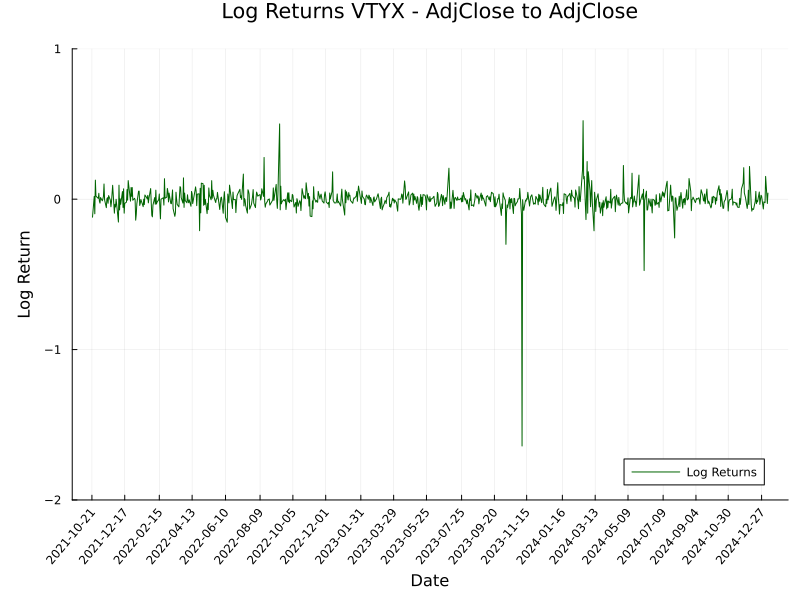

In [9]:
AdjClose = VTYX_data_01[:AdjClose]
dates = timestamp(AdjClose)
log_returns = log.(AdjClose ./ lag(AdjClose))

p_ret = plot(log_returns, 
    title = "Log Returns VTYX - AdjClose to AdjClose",
    label = "Log Returns",
    xlabel = "Date",
    ylabel = "Log Return",
    legend = :bottomright,
    xticks = (dates[1:40:end], dates[1:40:end]),
    xrotation = 50,
    ylims = (-2, 1),
    size = (800,600),
    bottom_margin = 20px,
    left_margin = 20px,
    top_margin = 20px,
    color = :darkgreen
     )


In [10]:
plots_path = plotsdir("vtyx_log_returns_graf.png")
safesave(plots_path, p_ret)

In [11]:
function calculate_rolling_volatility(log_returns::TimeArray, window::Int=20)
    return moving(std, log_returns, window)
end

calculate_rolling_volatility (generic function with 2 methods)

In [12]:
rolling_std =  calculate_rolling_volatility(log_returns, 5)
current_name = colnames(rolling_std)[1]
TimeSeries.rename!(rolling_std, current_name => :Std_log_returns)
head(rolling_std, 5)

5×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2021-10-28 to 2021-11-03
┌────────────┬─────────────────┐
│            │ Std_log_returns │
├────────────┼─────────────────┤
│ 2021-10-28 │        0.100152 │
│ 2021-10-29 │       0.0792344 │
│ 2021-11-01 │        0.079394 │
│ 2021-11-02 │       0.0490398 │
│ 2021-11-03 │       0.0196461 │
└────────────┴─────────────────┘

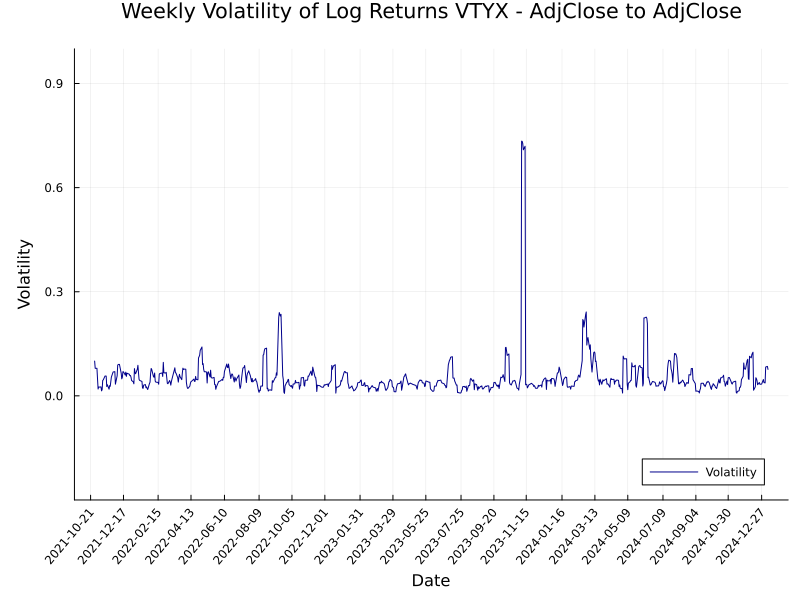

In [13]:
p_vol = plot(rolling_std, 
    title = "Weekly Volatility of Log Returns VTYX - AdjClose to AdjClose",
    label = "Volatility",
    xlabel = "Date",
    ylabel = "Volatility",
    legend = :bottomright,
    xticks = (dates[1:40:end], dates[1:40:end]),
    xrotation = 50,
    ylims = (-0.3, 1),
    size = (800,600),
    bottom_margin = 20px,
    left_margin = 20px,
    top_margin = 20px,
    color = :darkblue
     )

In [14]:
plots_path = plotsdir("vtyx_log_returns_volatility_graf.png")
safesave(plots_path, p_vol)

In [15]:
function create_summary_statistics(ta::TimeArray)

    data_matrix = values(ta) 
    data_vector = data_matrix[:, 1]

    clean_data = filter(!isnan, data_vector)

    stats = Dict(
        "N" => length(clean_data),
        "Mean" => mean(clean_data),
        "Std Dev" => std(clean_data),
        "Min" => minimum(clean_data),
        "Max" => maximum(clean_data),
        "Median" => median(clean_data),
        "Skewness" => skewness(clean_data),
        "Kurtosis" => kurtosis(clean_data) + 3 
    )
    

    df = DataFrame(Statistics = collect(keys(stats)), Value = collect(values(stats)))

    df[2:end, :Value] = round.(df[2:end, :Value], digits=4)
    
    return df
end
summary_table = create_summary_statistics(log_returns)

Row,Statistics,Value
,String,Real
1,Min,-1.64116
2,N,806.0
3,Median,-0.0033
4,Skewness,-8.2923
5,Kurtosis,173.373
6,Mean,-0.0026
7,Std Dev,0.0855
8,Max,0.5221


In [16]:
data_config = Dict(
    :dataset => "log_returns",
    :analysis => "summary_stats",
    :unit => "Log close to close"
)

filename = savename(data_config, "csv")
filepath = datadir("exp_pro", filename)

"c:\\Users\\jachy\\OneDrive\\IES\\mgr\\3.semestr\\Fineco\\assignement1\\data\\exp_pro\\analysis=summary_stats_dataset=log_returns_unit=Log close to close.csv"